<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/Thesis_CodeBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenges
1. Tokenizing
2. Processing Large files in Google Colab
3. Comments in code
4. TPU and XLA
5. codeBERT not Pretrained in C++
6. BERT token limit (512)
7. Tensor Trained Neural Network
8. Cosine similarity instead of dot produc
https://arxiv.org/abs/1702.05870

##References:

Models (CodeBERT): 
1. https://github.com/microsoft/CodeBERT
2. https://github.com/microsoft/CodeBERT/tree/master/CodeBERT/code2nl

Other Sources
2. https://favtutor.com/blogs/print-list-python
3. https://towardsdatascience.com/running-pytorch-on-tpu-a-bag-of-tricks-b6d0130bddd4
4. https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb#scrollTo=OApBOAe1fpH_

Diff in Codes:
1. difflib: http://pymotw.com/2/difflib/
2. diff patch match: https://pypi.org/project/diff-match-patch/

TPU Installation
1. https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb#scrollTo=vJZrkoejQhxK

Traversing Through a directory

1. https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# New Section

AST
1. https://github.com/pombredanne/python-ast-visualizer/blob/master/astvisualizer.py

2. https://github.com/lensvol/astboom

Similar Products

1. https://github.com/eth-sri/TFix
2. https://github.com/fluidattacks/NIST-SARD-Test-Suites
3. https://github.com/SySeVR/SySeVR

References
1. Code-Bert: https://arxiv.org/pdf/2002.08155.pdf

2. Code Database: https://arxiv.org/ftp/arxiv/papers/2108/2108.04631.pdf

3. SySeVR: https://github.com/SySeVR/SySeVR

Data-Sources

1. https://www.nist.gov/itl/ssd/software-quality-group/static-analysis-tool-exposition-sate-iv

2. SARD:  https://www.nist.gov/itl/ssd/software-quality-group/software-assurance-reference-dataset-sard-manual


Neural Network
1. https://www.atmosera.com/blog/text-classification-with-neural-networks/#:~:text=The%20first%20hidden%20layer%20in,rather%20than%20a%20single%20integer.

2. https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

Tensor Trained Neural Network
1. https://proceedings.mlr.press/v70/yang17e/yang17e.pdf


Miscelleneous

1. 




In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


## Getting TPU Setup


In [2]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [3]:
!pip install cloud-tpu-client==0.10 torch==1.11.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl

  Using cached https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl (152.9 MB)
  Using cached torch-1.11.0-cp37-cp37m-manylinux1_x86_64.whl (750.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0a0+git8d365ae
    Uninstalling torch-1.11.0a0+git8d365ae:
      Successfully uninstalled torch-1.11.0a0+git8d365ae


In [4]:
pip uninstall torch torchvision --yes

Found existing installation: torch 1.11.0
Uninstalling torch-1.11.0:
  Successfully uninstalled torch-1.11.0
Found existing installation: torchvision 0.13.0a0+7be2f55
Uninstalling torchvision-0.13.0a0+7be2f55:
  Successfully uninstalled torchvision-0.13.0a0+7be2f55


In [5]:
!pip install torch==1.11.0
!pip install torchvision

  Using cached torch-1.11.0-cp37-cp37m-manylinux1_x86_64.whl (750.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires torchvision, which is not installed.
  Using cached torchvision-0.12.0-cp37-cp37m-manylinux1_x86_64.whl (21.0 MB)


In [6]:
VERSION = "1.11"  #@param ["1.11", "nightly", "20220315"]  # or YYYYMMDD format
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION
import os 
os.environ['LD_LIBRARY_PATH']='/usr/local/lib'
!echo $LD_LIBRARY_PATH

!sudo ln -s /usr/local/lib/libmkl_intel_lp64.so /usr/local/lib/libmkl_intel_lp64.so.1
!sudo ln -s /usr/local/lib/libmkl_intel_thread.so /usr/local/lib/libmkl_intel_thread.so.1
!sudo ln -s /usr/local/lib/libmkl_core.so /usr/local/lib/libmkl_core.so.1

!ldconfig
!ldd /usr/local/lib/python3.7/dist-packages/torch/lib/libtorch.so

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6034  100  6034    0     0  42492      0 --:--:-- --:--:-- --:--:-- 42195
Updating... This may take around 2 minutes.
Updating TPU runtime to pytorch-1.11 ...
Found existing installation: torch 1.11.0
Uninstalling torch-1.11.0:
  Successfully uninstalled torch-1.11.0
Found existing installation: torchvision 0.12.0
Uninstalling torchvision-0.12.0:
  Successfully uninstalled torchvision-0.12.0
Copying gs://tpu-pytorch/wheels/colab/torch-1.11-cp37-cp37m-linux_x86_64.whl...
- [1 files][ 98.8 MiB/ 98.8 MiB]                                                
Operation completed over 1 objects/98.8 MiB.                                     
Copying gs://tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl...
- [1 files][145.8 MiB/145.8 MiB]                                                
Operation completed over 1 objects

In [7]:
# imports pytorch
import torch

# imports the torch_xla package
import torch_xla
import torch_xla.core.xla_model as xm

In [8]:
# Creates a random tensor on xla:1 (a Cloud TPU core)
dev = xm.xla_device()
t1 = torch.ones(3, 3, device = dev)
print(t1)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='xla:1')


In [9]:
print(dev)

xla:1


In [10]:
# Creating a tensor on the second Cloud TPU core
dev2 = xm.xla_device(n=2, devkind='TPU')
t2 = torch.zeros(3, 3, device = dev2)
print(t2)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='xla:2')


In [11]:
print(dev2)

xla:2


In [12]:
# Creating a tensor on the second Cloud TPU core
dev3 = xm.xla_device(n=3, devkind='TPU')
t2 = torch.zeros(3, 3, device = dev3)
print(t2)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='xla:3')


In [13]:
print(dev3)

xla:3


## Creating NL - PL Pair

In [14]:
!pip install transformers

In [15]:
import torch
from transformers import RobertaTokenizer, RobertaConfig, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")
model.to(dev)

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [16]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")
nl_tokens=tokenizer.tokenize("return maximum value")
nl_tokens

['return', 'Ġmaximum', 'Ġvalue']

In [17]:
code_tokens=tokenizer.tokenize("def max(a,b): if a>b: return a else return b")

In [18]:
nl_tokens

['return', 'Ġmaximum', 'Ġvalue']

In [19]:
tokens=[tokenizer.cls_token]+nl_tokens+[tokenizer.sep_token]+code_tokens+[tokenizer.sep_token]
tokens

['<s>',
 'return',
 'Ġmaximum',
 'Ġvalue',
 '</s>',
 'def',
 'Ġmax',
 '(',
 'a',
 ',',
 'b',
 '):',
 'Ġif',
 'Ġa',
 '>',
 'b',
 ':',
 'Ġreturn',
 'Ġa',
 'Ġelse',
 'Ġreturn',
 'Ġb',
 '</s>']

In [20]:
tokens_ids=tokenizer.convert_tokens_to_ids(tokens)
tvpairs = zip(tokens,tokens_ids)
for i in tvpairs: 
  print (tuple(i))

('<s>', 0)
('return', 30921)
('Ġmaximum', 4532)
('Ġvalue', 923)
('</s>', 2)
('def', 9232)
('Ġmax', 19220)
('(', 1640)
('a', 102)
(',', 6)
('b', 428)
('):', 3256)
('Ġif', 114)
('Ġa', 10)
('>', 15698)
('b', 428)
(':', 35)
('Ġreturn', 671)
('Ġa', 10)
('Ġelse', 1493)
('Ġreturn', 671)
('Ġb', 741)
('</s>', 2)


In [21]:
context_embeddings=model(torch.tensor(tokens_ids)[None,:])[0]
context_embeddings

tensor([[[-0.1423,  0.3766,  0.0443,  ..., -0.2513, -0.3099,  0.3183],
         [-0.5739,  0.1333,  0.2314,  ..., -0.1240, -0.1219,  0.2033],
         [-0.1579,  0.1335,  0.0291,  ...,  0.2340, -0.8801,  0.6216],
         ...,
         [-0.4042,  0.2284,  0.5241,  ..., -0.2046, -0.2419,  0.7031],
         [-0.3894,  0.4603,  0.4797,  ..., -0.3335, -0.6049,  0.4730],
         [-0.1433,  0.3785,  0.0450,  ..., -0.2527, -0.3121,  0.3207]]],
       grad_fn=<NativeLayerNormBackward0>)

In [22]:
from transformers import RobertaConfig, RobertaTokenizer, RobertaForMaskedLM, pipeline
model = RobertaForMaskedLM.from_pretrained("microsoft/codebert-base-mlm")
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base-mlm")

Downloading:   0%|          | 0.00/504 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

#Patch Detection or Change in Code

## difflib: Use for texts

In [23]:
text1 = """Saurav Is a good boy"""
text1_lines = text1.splitlines()

text2 = """Saurav is a bad boy """
text2_lines = text2.splitlines()

In [24]:
import difflib
d = difflib.Differ()
diff = d.compare(text1_lines, text2_lines)
print ('\n'.join(diff))

- Saurav Is a good boy
?        ^    ^^^

+ Saurav is a bad boy 
?        ^    ^^     +



## diffUtils: Good for codes


In [25]:
!pip install --upgrade setuptools


     |████████████████████████████████| 1.1 MB 5.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
earthengine-api 0.1.307 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.8.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [26]:
!python -m pip install diff-match-patch


     |████████████████████████████████| 61 kB 188 kB/s 


In [27]:
Source = "I am the very model of a modern Major-General."
Update ="I am the very model of a cartoon individual.matters?"

In [28]:
from diff_match_patch import diff_match_patch

dmp = diff_match_patch()
patches = dmp.patch_make(Source, Update)
diff = dmp.patch_toText(patches)
diff

'@@ -22,25 +22,31 @@\n f a \n-modern Major-General.\n+cartoon individual.matters?\n'

In [29]:
from diff_match_patch import diff_match_patch

dmp = diff_match_patch()
patches = dmp.patch_fromText(diff)
new_text1, _ = dmp.patch_apply(patches, Source)


In [30]:
print(new_text1)

I am the very model of a cartoon individual.matters?


##patch test

In [31]:
add = """ 
def add(a, b):
  return a + b
"""

sub = """
def add(a,b):
  return a - b
"""

In [32]:
codeB2G = """
package testcases.CWE191_Integer_Underflow.s05; 
import testcasesupport.*; 
  
public class CWE191_Integer_Underflow__short_rand_predec_81_goodB2G extends CWE191_Integer_Underflow__short_rand_predec_81_base 
{ 
    public void action(short data ) throws Throwable 
    { 
  
        /* FIX: Add a check to prevent an underflow from occurring */
        if (data > Short.MIN_VALUE) 
        { 
            short result = (short)(--data); 
            IO.writeLine("result: " + result); 
        } 
        else
        { 
            IO.writeLine("data value is too small to decrement."); 
        } 
  
    } 
} 
"""

In [33]:
codeG2B = """
package testcases.CWE191_Integer_Underflow.s05; 
import testcasesupport.*; 
  
public class CWE191_Integer_Underflow__short_rand_predec_81_goodG2B extends CWE191_Integer_Underflow__short_rand_predec_81_base 
{ 
    public void action(short data ) throws Throwable 
    { 
  
        /* POTENTIAL FLAW: if data == Short.MIN_VALUE, this will overflow */
        short result = (short)(--data); 
  
        IO.writeLine("result: " + result); 
  
    } 
} 
} 
"""

In [34]:
def findPatch(Source, Update):
  from diff_match_patch import diff_match_patch
  tmpPatch = diff_match_patch()
  tempPatches = dmp.patch_make(Source, Update)
  diff = dmp.patch_toText(tempPatches)
  tempPatches = dmp.patch_fromText(diff)
  tempdiff = dmp.patch_toText(tempPatches)
  print(tempdiff)

def applyPatch(code,patch):
  from diff_match_patch import diff_match_patch
  dmp = diff_match_patch()
  new_text1, _ = dmp.patch_apply(patch, code)
  print(new_text1)



In [35]:
#Testing Block for two functions
add2sub = findPatch(sub,add)
applyPatch(add, add2sub)
sub2add = findPatch(add,sub)
applyPatch(sub, sub2add)


@@ -1,8 +1,9 @@
+ 
 %0Adef add
@@ -5,16 +5,17 @@
 f add(a,
+ 
 b):%0A  re
@@ -25,8 +25,8 @@
 n a 
--
++
  b%0A

 
def add(a, b):
  return a + b

@@ -1,9 +1,8 @@
- 
 %0Adef add
@@ -4,17 +4,16 @@
 f add(a,
- 
 b):%0A  re
@@ -23,8 +23,8 @@
 n a 
-+
+-
  b%0A


def add(a,b):
  return a - b



In [36]:
#Testing Block for two functions
add2sub = findPatch(codeG2B,codeB2G)
print(add2sub)


@@ -141,11 +141,11 @@
 good
-G2B
+B2G
  ext
@@ -284,34 +284,85 @@
  /* 
-POTENTIAL FLAW:
+FIX: Add a check to prevent an underflow from occurring */%0A       
  if 
+(
 data 
-==
+%3E
  Sho
@@ -377,32 +377,26 @@
 ALUE
-, this will overflow */%0A
+) %0A        %7B %0A    
     
@@ -430,25 +430,26 @@
 --data); %0A  
-%0A
+  
         IO.w
@@ -486,16 +486,127 @@
  %0A  
+      %7D %0A        else%0A        %7B %0A            IO.writeLine(%22data value is too small to decrement.%22); %0A        %7D %0A  
 %0A    
-%7D %0A
 %7D %0A%7D

None


##Creating Data


In [37]:
import os
import shutil

folder = r"/content/drive/MyDrive/Thesis/DataBackup/CWE-789/CWE-789/testcases/000/117"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
dst = '/content/drive/MyDrive/Thesis/DataBackup/CWE-789/CWE-789/testcases/000/117'
for sub in subfolders:
    for f in os.listdir(sub):
      src = os.path.join(sub, f)
      dst = folder
      if f.endswith('.cpp'):
          shutil.move(src, dst)



In [38]:
import os
import shutil

folder = r"/content/drive/MyDrive/Thesis/CWE195"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
dst = '/content/drive/MyDrive/Thesis/CWE195'


for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = folder
        print ("src: ",  src , "dst: ",dst)
        if f.endswith('.cpp'):
          shutil.move(src, dst)


In [39]:
import os
import shutil

folder = r"/content/drive/MyDrive/Thesis/DataSet/CWE-090"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
dst = '/content/drive/MyDrive/Thesis/DataSet/CWE-090'


for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = folder
        print ("src: ",  src , "dst: ",dst)
        if f.endswith('.cpp'):
          shutil.move(src, dst)



##Extracting Features

##Converting C++ to Tensor

##Remvoing comments from all c++ files


###Creating Regex

In [40]:
f = open("/content/drive/MyDrive/Thesis/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execl_43.cpp", 'r')
c =f.read()
import re
pat = "F"
Codey = re.sub(pat, " ", c)
print(y)
writefile = open('/content/drive/MyDrive/Thesis/CWE-078/sample1.txt', 'w')
writefile.write(y)
Codey

NameError: ignored

###Reading c++ as text

In [ ]:
f = open("/content/drive/MyDrive/Thesis/CWE-078/CWE78_OS_Command_Injection__wchar_t_file_w32spawnl_83_bad.cpp", "r")
CODE = f.read()
CODE

In [ ]:
import re
pat = "\/\*(.|\n)*?\*/"
pat1 ="\s"
Codey = re.sub(pat, "", CODE)
Codey = re.sub(pat1,"",Codey)
print(Codey)

###Convert code to tensor

###AutoTokenizer

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


# Init
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
modelx = AutoModel.from_pretrained("microsoft/codebert-base")
#model1.to(dev2)


# Tokenization 
code_tokens=tokenizer.tokenize(Codey)
tokens=code_tokens
tokens1 = tokenizer.tokenize(CODE)


# # Convert tokens to ids
tokens_ids=tokenizer.convert_tokens_to_ids(tokens)
context_embeddings=modelx(torch.tensor(tokens_ids)[None,:])[0]


# # Print
print(context_embeddings)

In [ ]:
print(tokens)

In [ ]:
print(tokens1)

In [ ]:
#@title ##GPT Tokenizer
from transformers import GPT2Tokenizer

text = "This is a sequence"

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
x = tokenizer.encode(Codey)

print(len(x))

###Tokenizing all the files in the directory

In [ ]:

# import required module
from pathlib import Path
 
# assign directory
directory = '/content/drive/MyDrive/Thesis/DataSet/CWE-090'
 
# iterate over files in
# that directory
files = Path(directory).glob('*')
for file in files:
    print(file)

In [41]:
#@title ##Converting all files into numpy array of tokens and tensors
#@markdown ####function Code2Tensor
def code2Tensor(directory,vulnerability,programmingLanguage,fileExtension):
  
  #@markdown #####necessary imports
  from pathlib import Path
  from transformers import AutoTokenizer, AutoModel
  from transformers import GPT2Tokenizer
  import torch
  import os
  import re

  #creating tokenizers
  tokenizerGPT = GPT2Tokenizer.from_pretrained("gpt2")
  tokenizerAuto = AutoTokenizer.from_pretrained("microsoft/codebert-base")

  #creating codeBERT model
  modelBERT = AutoModel.from_pretrained("microsoft/codebert-base")

 
  #Regex for C++ files
   
  pat = "\/\*(.|\n)*?\*/" #@param Regex for comment removal
  pat1 ="\s" #@param Regex for space removal

  features = []

  count = 0

  files = Path(directory).glob('*.cpp')
  for file in files:
    print(count,")",file)
    count = count + 1
    f = file.as_posix()
    if (count ==30):
      break


    CODE = None
    with open(f, 'r') as f:
      CODE = f.read() 

      #Regex operation
      CODE1 = re.sub(pat, "", CODE)
      CODE2 = re.sub(pat1,"",CODE1)

      # Tokenization 
      tokensForBert=tokenizerAuto.tokenize(CODE2) #@param for codeBERT
      tokensForStorage = tokenizerGPT.tokenize(CODE) #@param to Store

      if(len(tokensForBert)<514):

        # # Convert tokens to ids
        tokens_ids=tokenizerAuto.convert_tokens_to_ids(tokensForBert)
        Tensors=modelBERT(torch.tensor(tokens_ids)[None,:])[0]
      
        tempFeatures= [programmingLanguage,fileExtension,tokensForStorage,Tensors]
        features.append(tempFeatures)    
  print("*****Complete**********")
  return(features)



In [42]:
directory078 = '/content/drive/MyDrive/Thesis/CWE-078'
feature078 = code2Tensor(directory078,'CWE-078','C++','.cpp')



0 ) /content/drive/MyDrive/Thesis/CWE-078/CWE78_OS_Command_Injection__wchar_t_listen_socket_execl_43.cpp


Token indices sequence length is longer than the specified maximum sequence length for this model (1245 > 512). Running this sequence through the model will result in indexing errors


1 ) /content/drive/MyDrive/Thesis/CWE-078/CWE78_OS_Command_Injection__wchar_t_file_w32spawnl_83a.cpp


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
a = [1, 2, 3, 4, 5]


In [ ]:
b = np.pad(a, (2, 3), 'constant', constant_values=(4, 6))
b

In [ ]:
pd.DataFrame(feature078)


In [ ]:
tensor1 =feature078[0][3]
tensor2 = feature078[1][3]

In [ ]:
tensor1.shape

In [ ]:
Arr3 = tensor1.detach().numpy()
Arry11 = np.asarray(Arr3).astype(np.float32)

Arr4 = tensor2.detach().numpy()
Arry12 = np.asarray(Arr3).astype(np.float32)

In [ ]:
(x,y,z) = (Arry11.shape)
y

In [ ]:
Arry3 = np.reshape(Arry11,(354, 768))

In [ ]:
Arry4 = np.reshape(Arry12,(354, 768))

In [ ]:


Arr3100 = sliceArraybyIndex(100, Arry3)
print(Arr3100.shape)








In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(np.mean(cosine_similarity(Arry3, Arry4)))

In [ ]:
df1 =pd.DataFrame(feature078)

df1.columns =['Name', 'Code', 'Age', 'Weight']
df1

In [ ]:
finalFeatures = feature078

In [ ]:
directory762 = '/content/drive/MyDrive/Thesis/CWE-762'
feature762 = code2Tensor(directory762,'CWE-762','C++','.cpp')


In [ ]:
finalFeatures.append(feature762)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.DataFrame(feature762)

In [ ]:
featureList = feature762 + featu


In [ ]:
directory415 = '/content/drive/MyDrive/Thesis/CWE415'
feature415 = code2Tensor(directory415,'CWE-078','C++','.cpp')


In [ ]:
directory195 = '/content/drive/MyDrive/Thesis/CWE195'
feature195 = code2Tensor(directory195,'CWE-078','C++','.cpp')


In [ ]:
type(feature078)

In [ ]:
!pip install transformers


In [ ]:
output = open("/content/drive/MyDrive/Thesis/output.txt", "a")


In [10]:
!pip install transformers
import numpy as np

def sliceArraybyIndex(xIndex,yIndex,Array):
  newArray= []
  for i in range(xIndex):
    tempArray = Array[i][0:yIndex]
    newArray.append(tempArray)
  return np.array(newArray)

#@title ##Converting all files into numpy array of tokens and tensors
#@markdown ####function Code2Tensor
def code2Tensor(directory,vulnerability,programmingLanguage,fileExtension, vulCode):
  
  #@markdown #####necessary imports
  from pathlib import Path
  from transformers import AutoTokenizer, AutoModel
  from transformers import GPT2Tokenizer
  import torch
  import os
  import re

  #creating tokenizers
  tokenizerGPT = GPT2Tokenizer.from_pretrained("gpt2")
  tokenizerAuto = AutoTokenizer.from_pretrained("microsoft/codebert-base")

  #creating codeBERT model
  modelBERT = AutoModel.from_pretrained("microsoft/codebert-base")

 
  #Regex for C++ files
   
  pat = "\/\*(.|\n)*?\*/" #@param Regex for comment removal
  pat1 ="\s" #@param Regex for space removal

  features = []

  count = 0

  files = Path(directory).glob('*.cpp')
  for file in files:
    print(count,")",file)
    # if(count == 30):
    #       break
    f = file.as_posix()



    CODE = None
    with open(f, 'r') as f:
      CODE = f.read() 

      #Regex operation
      CODE1 = re.sub(pat, "", CODE)
      CODE2 = re.sub(pat1,"",CODE1)

            # Tokenization 
      tokensForBert= tokenizerAuto.tokenize(CODE2) #@param for codeBERT
      tokensForGPT = tokenizerGPT.tokenize(CODE) #@param to Store



      if(len(tokensForGPT) < 510):

        # # Convert tokens to ids
        tokens_ids=tokenizerAuto.convert_tokens_to_ids(tokensForGPT)
        Tensors=modelBERT(torch.tensor(tokens_ids)[None,:])[0]
        Arr3D = Tensors.detach().numpy()
        Arr = np.asarray(Arr3D).astype(np.float32)
        shape = (Arr.shape)
        (x,y,z) = shape
        Arr2D = Arr.reshape(x*y,z)
        finArray = sliceArraybyIndex(32,32, Arr2D )
        reshaped = finArray.shape


        
        tempFeatures= [programmingLanguage,vulnerability, tokensForBert,finArray, reshaped, vulCode]
        features.append(tempFeatures) 
        
  print("*****Complete**********")
  return(features)








featureTable = []

from pathlib import Path
parent_dir = '/content/drive/MyDrive/Thesis/DataSet'
featureTable = []
files = Path(parent_dir).glob('*')
num = 0
for file in files:
  num_token = np.array([num])
  num = num +1
  vul = str(file)
  print (vul)
  features = code2Tensor(file,vul,'C++','.cpp',num_token)
  featureTable = featureTable + features

    

/content/drive/MyDrive/Thesis/DataSet/CWE-762


Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_44.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_81a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__realloc_delete_array_01_good1.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_34.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_81_goodB2G.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_45.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_82_goodG2B.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-762/CWE762_Mismatched_Memory_Management_Routines__new_free_wchar_t_81_goodG2B.cpp
0 ) /

Token indices sequence length is longer than the specified maximum sequence length for this model (1236 > 512). Running this sequence through the model will result in indexing errors


0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/CWE78_OS_Command_Injection__wchar_t_listen_socket_w32_spawnvp_73a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/CWE78_OS_Command_Injection__wchar_t_listen_socket_w32_spawnvp_81a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execl_84_goodG2B.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execl_33.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execlp_74a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execlp_82_goodG2B.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execl_73b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-078/Copy of CWE78_OS_Command_Injection__wchar_t_listen_socket_execlp_62a.cpp
0 ) /content

Token indices sequence length is longer than the specified maximum sequence length for this model (1493 > 512). Running this sequence through the model will result in indexing errors


0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_listen_socket_33.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_console_73b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_file_74a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_environment_72b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_console_72b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_file_72b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_connect_socket_33.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_connect_socket_74b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_file_74b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-090/CWE90_LDAP_Injection__w32_char_environment_33.cpp
0 ) /content/d

Token indices sequence length is longer than the specified maximum sequence length for this model (987 > 512). Running this sequence through the model will result in indexing errors


0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__listen_socket_malloc_33.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__listen_socket_malloc_72a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__listen_socket_malloc_72b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__rand_malloc_73a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__negative_malloc_74a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__rand_malloc_72a.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__listen_socket_malloc_73b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE-195/CWE195_Signed_to_Unsigned_Conversion_Error__negative_malloc_73b.cpp
0 ) /content/drive/MyDrive/Thesis/DataSet/CWE

In [3]:
import numpy as np
import pandas as pd

In [11]:
df_vul = pd.DataFrame(featureTable)
col_names =["programmingLanguage", "directory","tokensForStorage","TensorsArrays", "reshaped", "vulCode"]
df_vul.columns = col_names
df_vul['cve'] = df_vul['directory'].str.split('/content/drive/MyDrive/Thesis/DataSet/CWE-', expand=True)[1]


In [12]:
df_vul = df_vul.drop(columns=['directory'])


In [13]:
df_vul['cve'] = df_vul['cve'].astype(int)


In [14]:
df_vul['cve'] = df_vul['cve'].to_list()

In [15]:
 df_vul['cve'] = np.asarray(df_vul['cve'])

In [16]:
df_vul

,programmingLanguage,tokensForStorage,TensorsArrays,reshaped,vulCode,cve
0,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.092076294, -0.004570827, -0.12751421, 0.2...","(32, 32)",[0],762
1,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.08689322, 0.015925698, -0.11392149, 0.231...","(32, 32)",[0],762
2,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.09013606, 0.005485289, -0.1367512, 0.2398...","(32, 32)",[0],762
3,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.09886316, -0.01898697, -0.11873086, 0.256...","(32, 32)",[0],762
4,C++,"[#, if, nd, ef, OM, IT, B, AD, #, include, "", ...","[[-0.07239028, 0.0044452026, -0.12762626, 0.24...","(32, 32)",[0],762
5,C++,"[#, if, nd, ef, OM, IT, B, AD, #, include, "", ...","[[-0.07992219, -0.03227803, -0.13118385, 0.255...","(32, 32)",[0],762
6,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.06167583, -0.014606506, -0.0807226, 0.368...","(32, 32)",[1],78
7,C++,"[#, if, nd, ef, OM, IT, GO, OD, #, include, "",...","[[-0.06635376, -0.007411815, -0.08527582, 0.36...","(32, 32)",[1],78
8,C++,"[#, if, nd, ef, OM, IT, B, AD, #, include, "", ...","[[-0.06637017, -0.00039388984, -0.08135007, 0....","(32, 32)",[1],78
9,C++,"[#, if, nd, ef, OM, IT, B, AD, #, include, "", ...","[[-0.071631126, 0.006057352, -0.0815859, 0.369...","(32, 32)",[1],78


In [17]:
data = df_vul.TensorsArrays.to_list()
final = []
for l in data:
  final.append(l)

In [18]:
import numpy as np
arr1 = np.asarray(final)


In [20]:
arr2 = arr1.reshape(60, 32, 32,1)

In [21]:
labels = df_vul.cve.to_list()
Labels = []
for l in labels:
  L =[l]
  Labels.append(L)

In [22]:
labels1 = np.asarray(Labels)
labels1.shape

(60, 1)

In [23]:
Target = df_vul.vulCode.to_list()
target = []
for t in Target:
  T =[t]
  target.append(T)
tgt = np.asarray(target)
tgt.shape
tgt.reshape(60,1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5]])

In [24]:
output = open("/content/drive/MyDrive/Thesis/output.txt", 'a')
output.write(str(featureTable))
df_vul.to_csv('/content/drive/MyDrive/Thesis/CSV-Repo/out.csv')
df_vul.to_excel('/content/drive/MyDrive/Thesis/CSV-Repo/out.xlsx')

In [25]:
X = arr2
y = tgt

#Convolutional Neural Network

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        64        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        2112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          4160      
                                                                 
Total params: 6,336
Trainable params: 6,336
Non-traina

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10))


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs= 10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 1s 179ms/step - loss: 2.3425 - accuracy: 0.0000e+00 - val_loss: 2.3000 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 2.2992 - accuracy: 0.6000 - val_loss: 2.2977 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 37ms/step - loss: 2.2967 - accuracy: 0.7500 - val_loss: 2.2953 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 39ms/step - loss: 2.2938 - accuracy: 0.7500 - val_loss: 2.2929 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 39ms/step - loss: 2.2909 - accuracy: 0.7500 - val_loss: 2.2905 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 39ms/step - loss: 2.2880 - accuracy: 0.7500 - val_loss: 2.2882 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 39ms/step - loss: 2.2851 - accuracy: 0.7500 - val_loss: 2.2858 - val_accuracy: 0.5000
Epoch 8/10
2/2 [======

1/1 - 0s - loss: 2.2789 - accuracy: 0.5000 - 27ms/epoch - 27ms/step


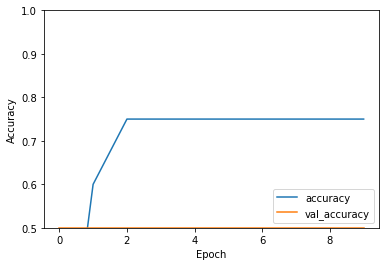

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)